In [1]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import independent
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
help(independent.get_independent_sampler)

Help on function get_independent_sampler in module cosmic.sample.sampler.independent:

get_independent_sampler(final_kstar1, final_kstar2, primary_model, ecc_model, porb_model, SF_start, SF_duration, binfrac_model, met, size=None, total_mass=inf, sampling_target='size', trim_extra_samples=False, **kwargs)
    Generates an initial binary sample according to user specified models
    
    Parameters
    ----------
    final_kstar1 : `int or list`
        Int or list of final kstar1
    
    final_kstar2 : `int or list`
        Int or list of final kstar2
    
    primary_model : `str`
        Model to sample primary mass; choices include: kroupa93, kroupa01, salpeter55, custom
        if 'custom' is selected, must also pass arguemts:
        alphas : `array`
            list of power law indicies
        mcuts : `array`
            breaks in the power laws.
        e.g. alphas=[-1.3,-2.3,-2.3],mcuts=[0.08,0.5,1.0,150.] reproduces standard Kroupa2001 IMF
    
    ecc_model : `str`
       

In [3]:
final_kstar1 = [10, 11, 12]
final_kstar2 = [0, 1]

In [4]:
help(independent.Sample.sample_SFH)

Help on function sample_SFH in module cosmic.sample.sampler.independent:

sample_SFH(self, SF_start=13700.0, SF_duration=0.0, met=0.02, size=None)
    Sample an evolution time for each binary based on a user-specified
    time at the start of star formation and the duration of star formation.
    The default is a burst of star formation 13,700 Myr in the past.
    
    Parameters
    ----------
    SF_start : float
        Time in the past when star formation initiates in Myr
    SF_duration : float
        Duration of constant star formation beginning from SF_Start in Myr
    met : float
        metallicity of the population [Z_sun = 0.02]
        Default: 0.02
    size : int, optional
        number of evolution times to sample
        NOTE: this is set in cosmic-pop call as Nstep
    
    Returns
    -------
    tphys : array
        array of evolution times of size=size
    metallicity : array
        array of metallicities



In [17]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', 
                                                                                                 final_kstar1, 
                                                                                                 final_kstar2, 
                                                                                                 binfrac_model='vanHaaften', 
                                                                                                 primary_model='kroupa01', 
                                                                                                 ecc_model='uniform', 
                                                                                                 porb_model='moe19', 
                                                                                                 SF_start=13700.0, 
                                                                                                 SF_duration=0.0, 
                                                                                                 met=0.02, 
                                                                                                 size=10000)

/Users/runqiuye/anaconda3/envs/cosmic/lib/python3.10/site-packages/cosmic/sample/sampler/independent.py:200: UserWarning: your supplied binfrac_model has been overwritten to 0.46 match Moe+2019
  warnings.warn('your supplied binfrac_model has been overwritten to {} match Moe+2019'.format(binfrac_model))


In [18]:
print(InitialBinaries)

       kstar_1  kstar_2    mass_1    mass_2          porb       ecc  \
0          1.0      0.0  1.407090  0.278416  4.232467e+04  0.162856   
1          0.0      0.0  0.603537  0.450256  5.681864e+05  0.272886   
2          1.0      1.0  2.531629  0.872397  1.973345e+05  0.498532   
3          0.0      0.0  0.547800  0.487403  7.270309e+01  0.853042   
4          1.0      1.0  1.585139  1.230364  1.759765e+04  0.935898   
...        ...      ...       ...       ...           ...       ...   
10112      1.0      1.0  1.894791  0.760518  4.510815e+07  0.334611   
10113      1.0      0.0  0.850831  0.231603  6.928427e+06  0.325193   
10114      0.0      0.0  0.611341  0.171413  5.266072e+07  0.477749   
10115      1.0      0.0  0.969693  0.192278  2.776929e+06  0.052975   
10116      1.0      1.0  1.866482  0.839846  2.131060e+04  0.847725   

       metallicity   tphysf   mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  \
0             0.02  13700.0  1.407090  0.278416  ...     0.0     0

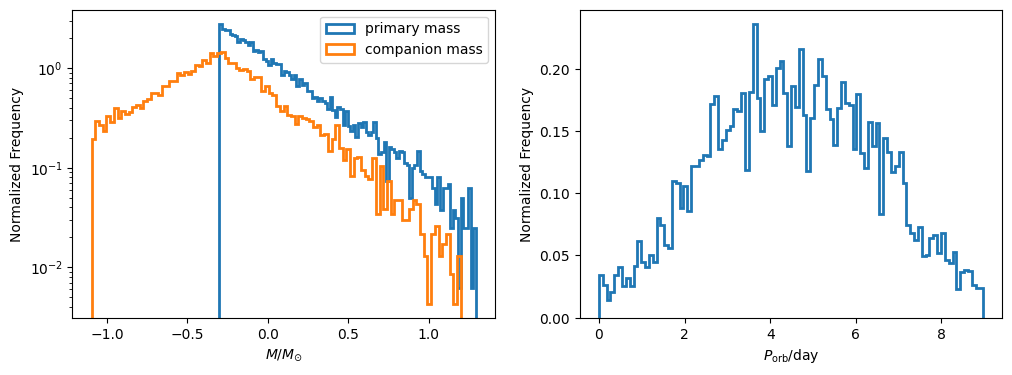

In [28]:
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(np.log10(InitialBinaries['mass_1']), bins=100, histtype='step', linewidth=2, label='primary mass', density=True)
axs[0].hist(np.log10(InitialBinaries['mass_2']), bins=100, histtype='step', linewidth=2, label='companion mass', density=True)
axs[0].set_yscale('log')

# Display the plot
axs[0].set_xlabel(r'$M/M_{\odot}$')
axs[0].set_ylabel('Normalized Frequency')
axs[0].legend()

axs[1].hist(np.log10(InitialBinaries['porb']), bins=100, histtype='step', linewidth=2, density=True)
axs[1].set_xlabel(r'$P_{\mathrm{orb}}$/day')
axs[1].set_ylabel('Normalized Frequency')
# axs[1].set_xscale('log')
# axs[1].set_xlim(0.1, 10**10)

plt.show()

In [8]:
print(mass_singles)
print(mass_binaries)
print(n_singles)
print(n_binaries)

25294.18143606924
51335.79859564988
63779
36221


In [9]:
from cosmic.sample.sampler import multidim

In [10]:
help(multidim.get_multidim_sampler)

Help on function get_multidim_sampler in module cosmic.sample.sampler.multidim:

get_multidim_sampler(final_kstar1, final_kstar2, rand_seed, nproc, SF_start, SF_duration, met, size, **kwargs)
    adapted version of Maxwell Moe's IDL code that generates a population of single and binary stars
    
    Below is the adapted version of Maxwell Moe's IDL code
    that generates a population of single and binary stars
    based on the paper Mind your P's and Q's
    By Maxwell Moe and Rosanne Di Stefano
    
    The python code has been adopted by Mads Sørensen
    
    Version history:
    V. 0.1; 2017/02/03
    By Mads Sørensen
    - This is a pure adaption from IDL to Python.
    - The function idl_tabulate is similar to
    the IDL function int_tabulated except, this function seems to be slightly
    more exact in its solution.
    Therefore, relative to the IDL code, there are small numerical differences.
    
    Comments below beginning with ; is the original nodes by Maxwell Moe.
   

In [11]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('multidim', 
                                                                                                 final_kstar1=[10,11,12], 
                                                                                                 final_kstar2=[0, 1], 
                                                                                                 rand_seed=2, 
                                                                                                 nproc=1, 
                                                                                                 SF_start=13700.0, 
                                                                                                 SF_duration=0.0, 
                                                                                                 met=0.02, 
                                                                                                 size=10)

In [12]:
print(InitialBinaries)

   kstar_1  kstar_2    mass_1    mass_2          porb       ecc  metallicity  \
0      1.0      0.0  1.199814  0.200592  2.806303e+02  0.494893         0.02   
1      1.0      1.0  3.686712  0.806328  1.610270e+05  0.829034         0.02   
2      1.0      0.0  0.858199  0.480240  2.550861e+04  0.372737         0.02   
3      1.0      0.0  4.525516  0.609651  1.932132e+01  0.255974         0.02   
4      1.0      1.0  0.900127  0.755146  6.763405e+03  0.803228         0.02   
5      0.0      0.0  0.550102  0.293160  1.126286e+05  0.618357         0.02   
6      0.0      0.0  0.581462  0.178872  5.743146e+04  0.808986         0.02   
7      1.0      1.0  0.974390  0.881366  2.533403e+01  0.126290         0.02   
8      0.0      0.0  0.625670  0.288596  1.506518e+05  0.814666         0.02   
9      0.0      0.0  0.544196  0.513049  7.104653e+06  0.642203         0.02   

    tphysf   mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  epoch_2  tms_1  \
0  13700.0  1.199814  0.200592  ...    

In [13]:
from cosmic.evolve import Evolve

In [14]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 
           'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 
           'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 
           'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 
           'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 
           'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 
           'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 
           'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 
           'zsun' : 0.019, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 
           'wd_mass_lim' : 1}

In [15]:
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

In [16]:
print(bcm.iloc[:10])
print(bcm.columns)

     tphys  kstar_1   mass0_1    mass_1       lum_1     rad_1        teff_1  \
0      0.0      1.0  1.199814  1.199814    1.632498  1.139473   6139.467436   
0  13700.0     10.0  0.376148  0.376148    0.000128  0.016420   4815.166605   
1      0.0      1.0  3.686712  3.686712  172.932854  2.235244  14062.954361   
1  13700.0     11.0  0.826031  0.826031    0.000003  0.010013   2445.028911   
2      0.0      1.0  0.858199  0.858199    0.323720  0.769997   4983.879703   
2  13700.0      1.0  0.858199  0.858199    0.623389  0.927370   5349.743762   
3      0.0      1.0  4.525516  4.525516  367.983475  2.508949  16031.743071   
3  13700.0     11.0  0.992039  0.992039    0.000004  0.008148   2797.013176   
4      0.0      1.0  0.900127  0.900127    0.408229  0.800520   5179.758937   
4  13700.0      1.0  0.900127  0.900127    0.947097  1.073555   5520.215660   

    massc_1    radc_1        menv_1  ...          porb           sep  \
0  0.000000  0.000000  8.201288e-03  ...  2.806303e+02    